In [1]:
import numpy as np
import sys
import _pickle
import matplotlib.pyplot as plt

In [2]:
# example of loading the cifar10 dataset
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


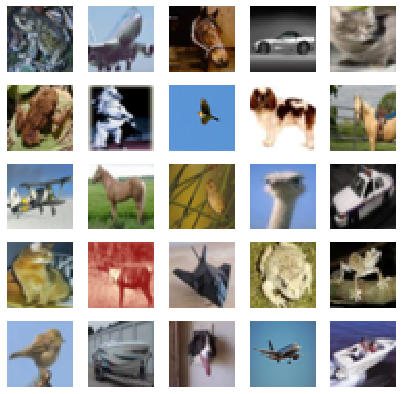

In [4]:
fig, axes1 = plt.subplots(5,5,figsize=(7,7))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(trainX)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(trainX[i:i+1][0])

In [5]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [6]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [7]:
# example of a 3-block vgg style architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

# example output part of the model
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

In [9]:
# fit model
history = model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 213s 4ms/step - loss: 1.7456 - accuracy: 0.3699 - val_loss: 1.4872 - val_accuracy: 0.4694
Epoch 2/30
50000/50000 [==============================] - 228s 5ms/step - loss: 1.3998 - accuracy: 0.4991 - val_loss: 1.3239 - val_accuracy: 0.5260
Epoch 3/30
50000/50000 [==============================] - 327s 7ms/step - loss: 1.2260 - accuracy: 0.5630 - val_loss: 1.2016 - val_accuracy: 0.5691
Epoch 4/30
50000/50000 [==============================] - 307s 6ms/step - loss: 1.0891 - accuracy: 0.6149 - val_loss: 1.0896 - val_accuracy: 0.6110
Epoch 5/30
50000/50000 [==============================] - 241s 5ms/step - loss: 0.9860 - accuracy: 0.6546 - val_loss: 1.0143 - val_accuracy: 0.6428
Epoch 6/30
50000/50000 [==============================] - 244s 5ms/step - loss: 0.9012 - accuracy: 0.6855 - val_loss: 0.9955 - val_accuracy: 0.6568
Epoch 7/30
50000/50000 [==============================] - 254s

In [11]:
model.evaluate(testX,testY,batch_size=64)

10000/10000 [==============================] - 9s 888us/step


[1.6814463592529296, 0.7077000141143799]

In [13]:
results=model.evaluate(testX,testY,batch_size=64)
print('test loss', results[0])
print('test acc', results[1])

10000/10000 [==============================] - 10s 962us/step
test loss 1.6814463592529296
test acc 0.7077000141143799


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


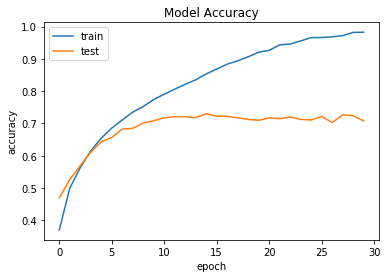

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate model
_, acc = model.evaluate(testX, testY)

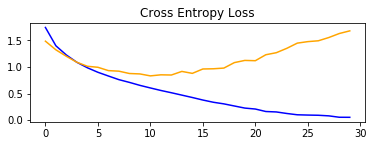

In [20]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

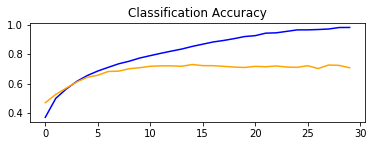

In [21]:
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')